In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/Indian-Resturants.csv")

In [4]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [5]:

df.head()
df.shape
df.info()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

,0
zipcode,163187
timings,3874
cuisines,1391
address,134
opentable_support,48
city,0
name,0
establishment,0
url,0
res_id,0


In [6]:
drop_cols = [
    'res_id','city_id','country_id',
    'url','address','zipcode','timings','highlights',
    'photo_count','opentable_support',
    'latitude','longitude'
]
df = df.drop(columns=drop_cols, errors='ignore')

print("Remaining columns:")
print(df.columns)

Remaining columns:
Index(['name', 'establishment', 'city', 'locality', 'locality_verbose',
       'cuisines', 'average_cost_for_two', 'price_range', 'currency',
       'aggregate_rating', 'rating_text', 'votes', 'delivery', 'takeaway'],
      dtype='object')


In [7]:
df.isnull().sum()


,0
name,0
establishment,0
city,0
locality,0
locality_verbose,0
cuisines,1391
average_cost_for_two,0
price_range,0
currency,0
aggregate_rating,0


In [8]:
df['cuisines'] = df['cuisines'].fillna('Unknown')


In [9]:
df.describe(include='all')

,name,establishment,city,locality,locality_verbose,cuisines,average_cost_for_two,price_range,currency,aggregate_rating,rating_text,votes,delivery,takeaway
count,211944,211944,211944,211944,211944,211944,211944.000000,211944.000000,211944,211944.000000,211944,211944.000000,211944.000000,211944.0
unique,41100,27,99,3731,3910,9383,NaN,NaN,1,NaN,39,NaN,NaN,NaN
top,Domino's Pizza,['Quick Bites'],Chennai,Civil Lines,"Ana Sagar Lake, Ajmer",North Indian,NaN,NaN,Rs.,NaN,Very Good,NaN,NaN,NaN
freq,3108,64390,11630,3660,1760,15996,NaN,NaN,211944,NaN,65451,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,595.812229,1.882535,NaN,3.395937,NaN,378.001864,-0.255907,-1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,606.239363,0.892989,NaN,1.283642,NaN,925.333370,0.964172,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,NaN,-18.000000,-1.000000,-1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,250.000000,1.000000,NaN,3.300000,NaN,16.000000,-1.000000,-1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,400.000000,2.000000,NaN,3.800000,NaN,100.000000,-1.000000,-1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,700.000000,2.000000,NaN,4.100000,NaN,362.000000,1.000000,-1.0


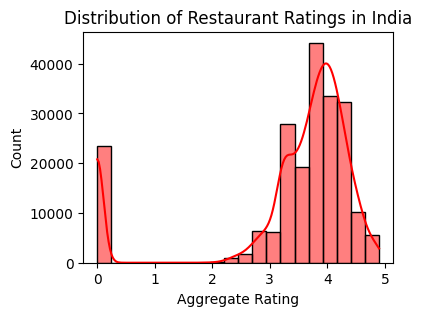

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,3))
sns.histplot(df['aggregate_rating'], bins=20, kde=True,color="red")
plt.title("Distribution of Restaurant Ratings in India")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()


mostly rastuarant lie between 3.5 -4.5

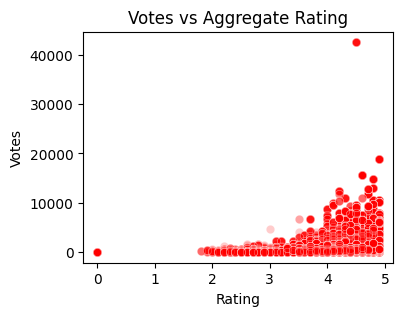

In [11]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='aggregate_rating', y='votes', data=df, alpha=0.2,color="red")
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.show()


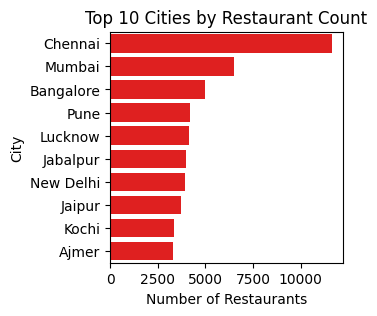

In [12]:
top_cities = df['city'].value_counts().head(10)

plt.figure(figsize=(3,3))
sns.barplot(x=top_cities.values, y=top_cities.index,color="red")
plt.title("Top 10 Cities by Restaurant Count")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()


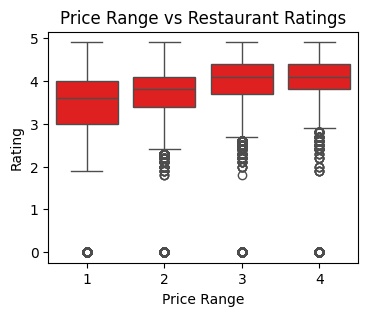

In [13]:
plt.figure(figsize=(4,3))
sns.boxplot(x='price_range', y='aggregate_rating', data=df,color="red")
plt.title("Price Range vs Restaurant Ratings")
plt.xlabel("Price Range")
plt.ylabel("Rating")
plt.show()


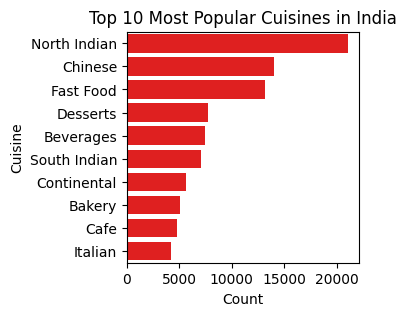

In [21]:
from collections import Counter

cuisine_list = df['cuisines'].str.split(', ')
cuisine_flat = [cuisine for sublist in cuisine_list for cuisine in sublist]

top_cuisines = Counter(cuisine_flat).most_common(10)

cuisine_df = pd.DataFrame(top_cuisines, columns=['Cuisine','Count'])

plt.figure(figsize=(3,3))
sns.barplot(x='Count', y='Cuisine', data=cuisine_df,color="red")
plt.title("Top 10 Most Popular Cuisines in India")
plt.show()


In [15]:
def rating_category(rating):
    if rating < 3.0:
        return 'Poor'
    elif rating < 4.0:
        return 'Average'
    elif rating < 4.5:
        return 'Good'
    else:
        return 'Excellent'

df['rating_category'] = df['aggregate_rating'].apply(rating_category)

df['rating_category'].value_counts()


,count
rating_category,
Average,97627
Good,65724
Poor,32728
Excellent,15865


In [16]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [17]:
df.columns

Index(['name', 'establishment', 'city', 'locality', 'locality_verbose',
       'cuisines', 'average_cost_for_two', 'price_range', 'currency',
       'aggregate_rating', 'rating_text', 'votes', 'delivery', 'takeaway',
       'rating_category'],
      dtype='object')

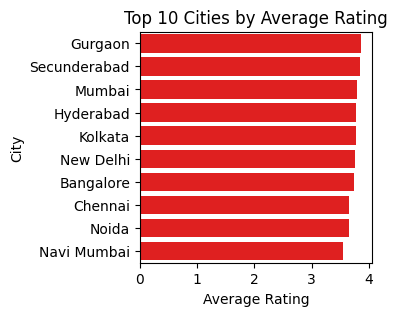

In [25]:
city_rating = (
    df.groupby('city')['aggregate_rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(3,3))
sns.barplot(x=city_rating.values, y=city_rating.index,color="red")
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()


In [23]:
def vote_category(v):
    if v < 50:
        return 'Low'
    elif v < 200:
        return 'Medium'
    elif v < 1000:
        return 'High'
    else:
        return 'Very High'

df['vote_category'] = df['votes'].apply(vote_category)

df['vote_category'].value_counts()


,count
vote_category,
Low,31767
Medium,13113
High,11470
Very High,3663


In [24]:
df[['aggregate_rating', 'votes', 'price_range']].corr()


,aggregate_rating,votes,price_range
aggregate_rating,1.000000,0.276279,0.253581
votes,0.276279,1.000000,0.249013
price_range,0.253581,0.249013,1.000000
